
## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680




### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [85]:
categorie_office_supplies = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
city = categorie_office_supplies.groupby(['Cidade'])['Valor_Venda'].agg(sum)
city_df = city.reset_index()
city_df.sort_values('Valor_Venda', ascending = False).head(1)

,Cidade,Valor_Venda
295,New York City,68362.814




### Qual o Total de Vendas Por Data do Pedido?


<AxesSubplot:xlabel='Data_Pedido'>

<Figure size 2000x600 with 0 Axes>

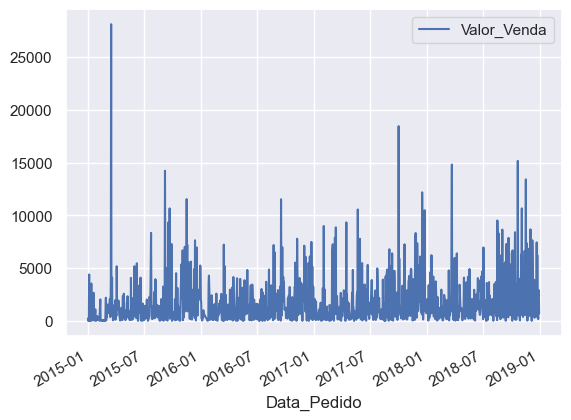

In [224]:
date_sells = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()
plt.figure(figsize = (20, 6))
date_sells.plot(x = 'Data_Pedido', y = 'Valor_Venda')



### Qual o Total de Vendas por Estado?



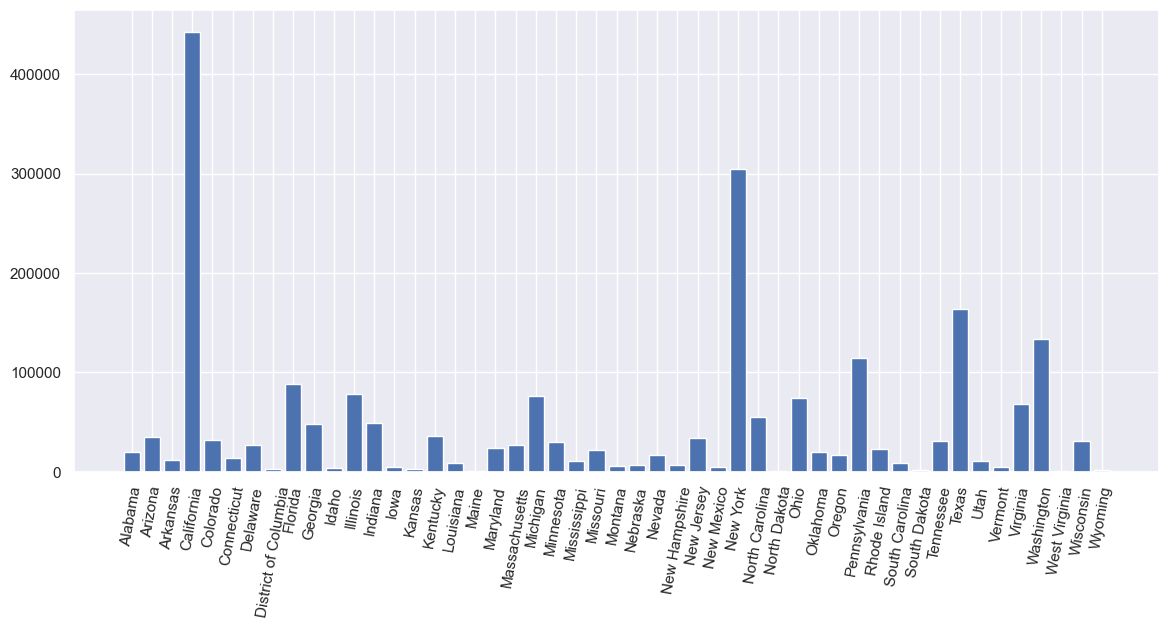

In [223]:
date_sells = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.bar(date_sells['Estado'], date_sells['Valor_Venda'])
plt.xticks(rotation = 80)
plt.show()


### Quais São as 10 Cidades com Maior Total de Vendas?



<BarContainer object of 11 artists>

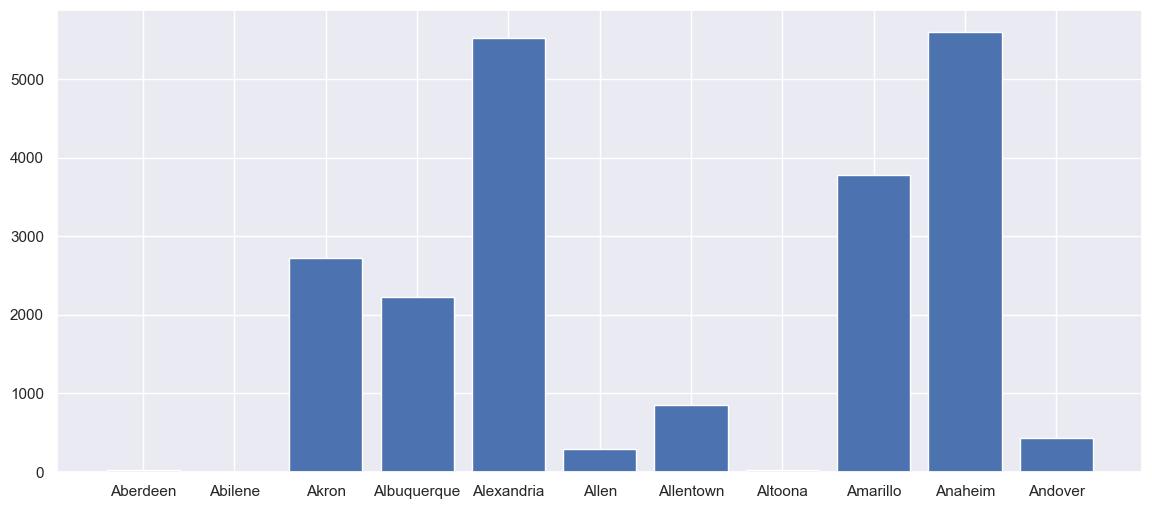

In [220]:
date_sells = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().head(11)

plt.figure(figsize=(14, 6))
plt.bar(date_sells['Cidade'], date_sells['Valor_Venda'])



### Qual Segmento Teve o Maior Total de Vendas?



<function matplotlib.pyplot.show(close=None, block=None)>

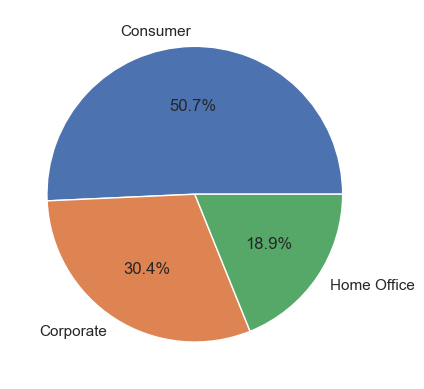

In [217]:
date_sells = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().head(11)
fig = plt.pie(date_sells['Valor_Venda'], labels=date_sells['Segmento'], autopct='%1.1f%%')
plt.show


### Qual o Total de Vendas Por Segmento e Por Ano?

In [149]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

df_dsa['Ano_Pedido'] = df_dsa['Data_Pedido'].dt.year

df_dsa

df_segmento = df_dsa.groupby(['Segmento', 'Ano_Pedido'])['Valor_Venda'].sum().reset_index()

df_segmento

,Segmento,Ano_Pedido,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332



Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [153]:
df_dsa[(df_dsa['Valor_Venda'] > 1000)]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017



### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [176]:
desconto15 = df_dsa[df_dsa['Valor_Venda'] > 1000].copy()
desconto15['Venda_Desconto'] = df_dsa['Valor_Venda']*0.85
desconto15[['Valor_Venda', 'Venda_Desconto']].mean()

Valor_Venda       2116.807815
Venda_Desconto    1799.286643
dtype: float64



### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?



In [195]:
#extraindo o mes do pedido
df_dsa['Mes_Pedido'] = df_dsa['Data_Pedido'].dt.month

#extraindo media por mes
df_extract = df_dsa.groupby(['Ano_Pedido','Segmento','Mes_Pedido'])['Valor_Venda'].mean().reset_index()
df_extract

,Ano_Pedido,Segmento,Mes_Pedido,Valor_Venda
0,2015,Consumer,1,146.736787
1,2015,Consumer,2,117.327926
2,2015,Consumer,3,152.170564
3,2015,Consumer,4,189.762750
4,2015,Consumer,5,191.337439
...,...,...,...,...
139,2018,Home Office,8,176.160606
140,2018,Home Office,9,249.140597
141,2018,Home Office,10,412.576597
142,2018,Home Office,11,247.519423


<Figure size 1200x600 with 0 Axes>

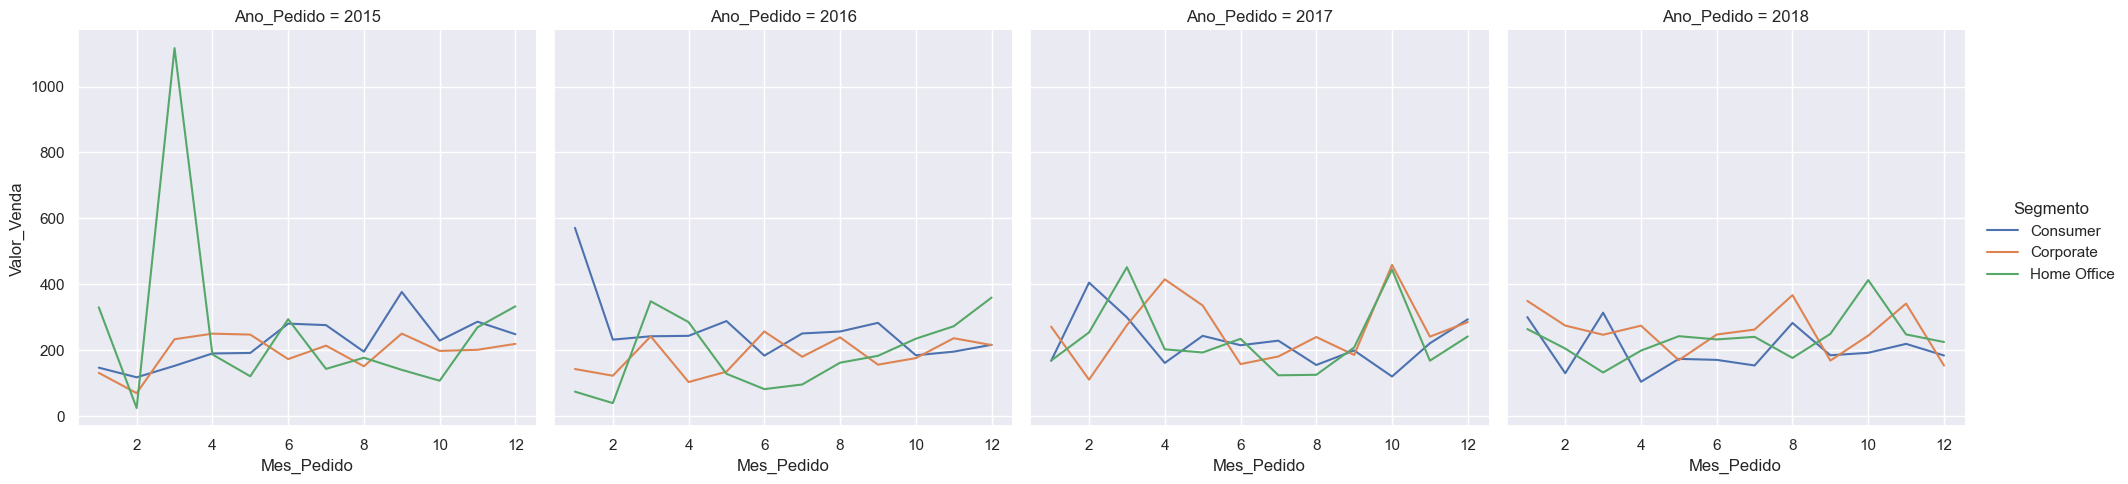

In [200]:
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_extract, 
                   y = 'Valor_Venda', 
                   x = 'Mes_Pedido',
                   hue = 'Segmento', 
                   col = 'Ano_Pedido',
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

<Figure size 1400x600 with 0 Axes>

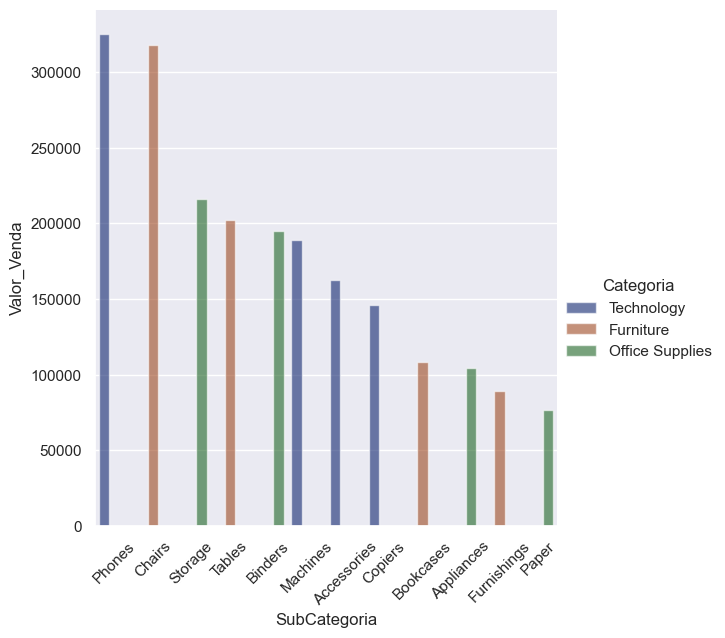

In [235]:
df = df_dsa.groupby(['Categoria','SubCategoria'])['Valor_Venda'].sum().reset_index()
df_top = df.sort_values('Valor_Venda', ascending=False).head(12)
df_top

plt.figure(figsize=(14, 6))
sns.set()
g = sns.catplot(
    data=df_top, kind="bar",
    x="SubCategoria", y="Valor_Venda", hue="Categoria",
    palette="dark", alpha=.6, height=6
)

plt.xticks(rotation=45)


plt.show()

# Fim